# External Fields

This notebook illustrates the use of EM external fields that can be superimposed in the simulatiuon. Adding an external field is done using `ExternalField` objects and the `emf.set_ext_fld()` method as exemplified below. The following types of external fields are supported:

* "**none**" - no external field
* "**uniform**" - spatially uniform field
* "**custom**" - field defined by a custom function

The external electric and magnetic fields can be set separately.

Please note that the usual field diagnostics will only report on the self consistent fields. If you want to the look at the full (self consistent + external) fields use the `sim.emf.*_part` properties, e.g. `sim.emf.Bz_part`

Currently only EM1D and EM2D support external fields, adding this feature to the remaining codes is in the pipeline.

## 1D External fields

The section below gives an example of an external B-field in 1D. Please note that when using the "custom" field types, the function must take exactly 2 arguments:
* `ix` - the cell index for which the field is being calculated
* `dx` - the cell size in simulation units

This function must return a 3 value list of all the field components. Also note that the position of all field components is not the same inside the cell, and that should be taken into account when calculating the field values.

In [1]:
# Add zpic library to path
import sys
sys.path.append("../../lib")

import em1d

import numpy as np

nx = 120
box = 4 * np.pi
dt = 0.1

ppc = 10

electrons = em1d.Species( "electrons", -1.0, ppc )

sim = em1d.Simulation( nx, box, dt, species = electrons )

# Add external fields

#ext = em1d.ExternalField(B_type = 'uniform', B_0 = [0.0,0.0,1.0])

def sin2( ix, dx ):
    # Bz is located at the center of the cell
    x = (ix+0.5)*dx
    return [0,0,np.sin(x)**2]

ext = em1d.ExternalField(B_type = 'custom', B_custom = sin2 )

sim.emf.set_ext_fld( ext )


The external fields will be initialized before the simulation begins so they can be plotted immediatly:

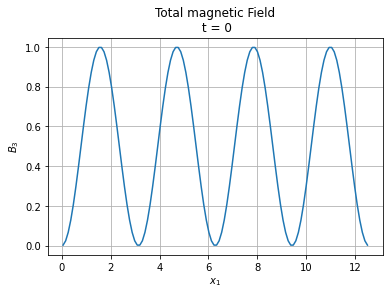

In [2]:
import matplotlib.pyplot as plt

# Plot field values at the center of the cells
xmin = sim.dx/2
xmax = sim.box - sim.dx/2

plt.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Bz_part )
plt.xlabel("$x_1$")
plt.ylabel("$B_3$")
plt.title("Total magnetic Field\n t = {:g}".format(sim.t))
plt.grid(True)

plt.show()

## 2D External fields

The section below gives an example of an external B-field in 2D. Please note that when using the "custom" field types, the function must take exactly 4 arguments:
* `ix` - the x cell index for which the field is being calculated
* `dx` - the x cell size in simulation units
* `iy` - the y cell index for which the field is being calculated
* `dy` - the y cell size in simulation units

Just like in 1D, this function must return a 3 value list of all the field components, and the position of field components inside the cell should be taken into account when calculating the field values.

In [3]:
import em2d
import numpy as np

# Time step
dt = 0.07
tmax = 0.07

# Background plasma
electrons = em2d.Species( "electrons", -1.0, ppc = [8,8] )

# Initialize simulation data
sim = em2d.Simulation( nx = [128,128], box = [12.8,12.8], dt = 0.07, 
                       species = electrons )

# Magnetic field from infinite current line
def extB(ix,dx,iy,dy):
    x0 = 6.4
    y0 = 6.4
    
    x = ix*dx       - x0;
    y = (iy+0.5)*dy - y0;

    r2 = x*x+y*y;
    bx = -y/r2;

    x = (ix+0.5)*dx - x0;
    y = iy*dy       - y0;

    r2 = x*x+y*y;
    by = x/r2;

    return [bx,by,0] 

ext = em2d.ExternalField(B_type = 'custom', B_custom = extB )

sim.emf.set_ext_fld( ext )

In this case we access the full fields (self-consistent + external) using the `sim.emf.Bx_part` and `sim.emf.By_part` properties:

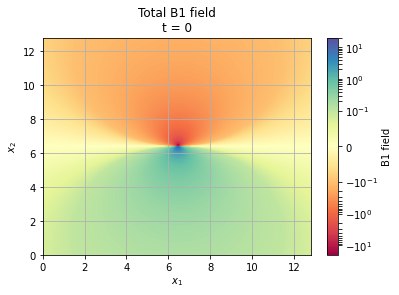

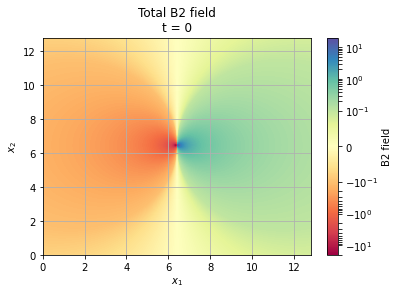

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

range = [[0,sim.box[0]],[0,sim.box[1]]]

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.imshow( sim.emf.Bx_part, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          norm = colors.SymLogNorm(linthresh=0.1),
          aspect = 'auto', cmap = 'Spectral' )
plt.colorbar().set_label('B1 field')

plt.title("Total B1 field\nt = {:g}".format(sim.t))

plt.grid(True)
plt.show()

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.imshow( sim.emf.By_part, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          norm = colors.SymLogNorm(linthresh=0.1),
          aspect = 'auto', cmap = 'Spectral' )
plt.colorbar().set_label('B2 field')

plt.title("Total B2 field\nt = {:g}".format(sim.t))

plt.grid(True)
plt.show()